<a href="https://colab.research.google.com/github/Aqillaaprly/ML_2025/blob/main/MIDTERM_2341720068_Aqilla_Aprily_Kurnia_Sari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
from itertools import combinations
import random
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import google.colab.drive
google.colab.drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# CASE STUDY 3

- This case study is about liver disease characteristics.
- For students with attendance numbers 3, 6, 9, 12, etc.
- Follow these steps and analyze the results.

## Data Preprocessing (10 points)

### 1. Load data (0 points)

In [65]:
# Load Data
df = pd.read_csv('/content/drive/MyDrive/Machine Learning/3_heart.csv')
print("Shape:", df.shape)
display(df.head())

Shape: (1025, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### 2. Check data description for missing values. If yes, mention how many and in which features. (5 points)

In [66]:
print("Data Info:")
df.info()

print("\nMissing Values Count:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB

Missing Values Count:
Series([], dtype: int64)


From the data above, there are no missing values detected, all the data came as non-null count

### 3. Drop irrelevant features for the clustering process. (5 points)

In [67]:
df = df.drop(columns=['target'])
print("New shape:", df.shape)

New shape: (1025, 13)


I decide to drop 'target' feature since what we want to do here is clustering as unsupervised learning and 'target' is a class label and used for supervised learning.

## Feature Selection (20 points)

### 1. Select your top 5 variables from all available variables. (10 points)

1. Sex : Represent patient's gender which can influence heart disease risk patterns.
2. fbs (Fasting Bloos Sugar) : Indicates the fasting blood sugar level as a marker related to diabetes and heart disease
3. Age : Age as major risk factor
4. Trestbps : Measure resting blood pressure.
5. Cp (Chest Pain Type) : DEscribe the type of chest pain as early symptom to heart disease.

### 2. How did you select these 5 variables? Explain your reasoning. (10 points)

PCA Loadings:


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
age,0.309574,0.398286,-0.070616,0.053975,0.290981,0.204218,-0.249728,0.235570,-0.383547,-0.004413,-0.114808,0.542605,-0.196650
sex,0.078073,-0.379076,0.618113,0.006604,-0.049592,-0.015825,-0.184611,0.104707,-0.198855,0.546399,-0.282643,0.002102,-0.048550
cp,-0.285616,0.274947,0.198286,-0.403411,-0.188481,0.228271,-0.216087,-0.122017,-0.327642,0.141045,0.594051,-0.106640,0.006520
trestbps,0.178760,0.438909,0.154674,-0.128736,-0.241707,0.139863,0.310433,0.622511,0.289129,0.144485,-0.066094,-0.253216,-0.008689
chol,0.127985,0.369819,-0.251021,0.468203,-0.305881,0.005674,0.061741,-0.411463,-0.154697,0.482187,-0.100810,-0.176414,0.014111
fbs,0.080713,0.321476,0.447107,-0.176946,0.233021,-0.280946,0.517997,-0.361286,-0.224158,-0.188297,-0.159852,0.020627,0.123148
restecg,-0.129490,-0.244760,-0.238472,-0.179450,0.274561,0.632247,0.511241,-0.076549,-0.115155,0.251059,-0.099845,-0.003988,-0.075031
thalach,-0.416970,0.093830,0.197128,0.096199,-0.333954,0.056088,0.165287,-0.139152,0.356564,0.030142,-0.039872,0.596809,-0.349352
exang,0.363869,-0.258613,-0.050942,0.129796,-0.017338,-0.310502,0.385981,0.135023,-0.088739,0.193727,0.627112,0.213463,-0.181965
oldpeak,0.421781,-0.070527,-0.044178,-0.322653,-0.260365,0.165167,-0.054706,-0.213249,0.247533,0.088694,-0.002602,0.374394,0.598511



Feature Importance (Top 5):


,0
sex,1.075262
fbs,0.849297
age,0.778476
trestbps,0.772343
cp,0.758850


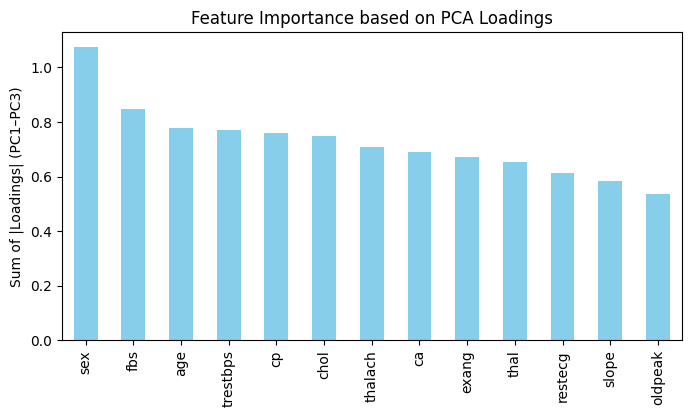

In [68]:
# Standardisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# PCA running
pca = PCA(n_components=len(df.columns))
pca.fit(X_scaled)

loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(len(df.columns))],
    index=df.columns
)
print("PCA Loadings:")
display(loadings)

# contribution absolute
feature_importance = loadings[['PC1','PC2','PC3']].abs().sum(axis=1)
feature_importance = feature_importance.sort_values(ascending=False)

print("\nFeature Importance (Top 5):")
display(feature_importance.head(5))

# Visualization
feature_importance.plot(kind='bar', figsize=(8,4), color='skyblue')
plt.title("Feature Importance based on PCA Loadings")
plt.ylabel("Sum of |Loadings| (PC1–PC3)")
plt.show()


I selected all that features based on the PCA results, the loading matrix shows each features contribution to the principal components (PC1-PC13).
High loading values indicate that a feature strongly influences data variation in that component, highlighting its importance in explaining the datasets variance.

## Clustering - 1 (30 points)


### 1. Create a cluster model using KMeans with the number of clusters from 1 to 10. (10 points)

In [69]:
best_features = ['sex', 'fbs', 'age', 'trestbps', 'cp']
X_selected = df[best_features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

In [70]:

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

sse_table = pd.DataFrame({ 'k': list(range(1, 11)), 'SSE': inertia })
print(sse_table)

    k          SSE
0   1  5125.000000
1   2  4174.155871
2   3  3254.541482
3   4  2634.960416
4   5  2359.669753
5   6  2062.550826
6   7  1905.039767
7   8  1817.056825
8   9  1640.159313
9  10  1491.801533


SSE decreases steadily as k increases, with the most noticeable improvement up to k = 3. Beyond that, the reduction becomes marginal, suggesting that k = 3 is the optimal number of clusters.

### 2. Create an elbow diagram, determine the best number of clusters according to the elbow method, and provide your reasoning. (10 points)

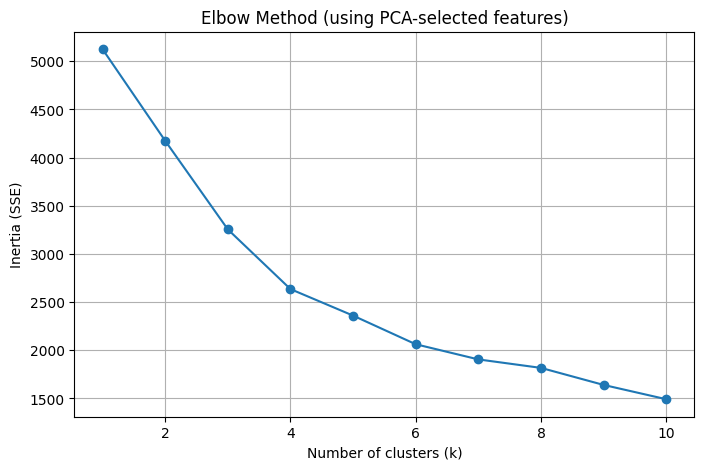

In [71]:
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-')
plt.title('Elbow Method (using PCA-selected features)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (SSE)')
plt.grid(True)
plt.show()

Based on the Elbow Method, the curve bends in k = 3, as SSE reduction slows beyond this point. So, the optimal number of clusters is 3.

### 3. Calculate the silhouette coefficient value for k=1 to k=10. Based on the silhouette value, what is the best number of clusters? Is it the same as the elbow method? (10 points)

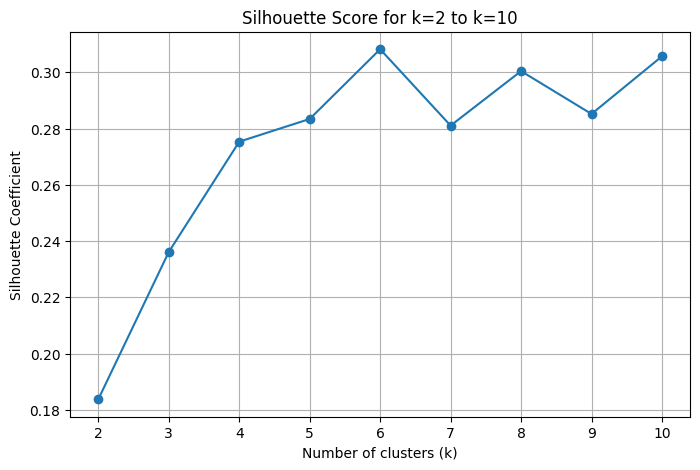

k=2, silhouette=0.184
k=3, silhouette=0.236
k=4, silhouette=0.275
k=5, silhouette=0.283
k=6, silhouette=0.308
k=7, silhouette=0.281
k=8, silhouette=0.300
k=9, silhouette=0.285
k=10, silhouette=0.306


In [72]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8,5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for k=2 to k=10')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)
plt.show()

for i, score in enumerate(silhouette_scores, start=2):
    print(f"k={i}, silhouette={score:.3f}")


The silhouette coefficient values gradually increase from k = 2 (0.184) to k = 6 (0.308), indicating that the quality of clustering improves as the number of clusters increases up to that point. After k = 6, the scores fluctuate slightly without significant improvement, suggesting potential over-segmentation. Therefore, k = 6 provides the most balanced and well-separated clustering structure among all tested values. With this result, it show that different method can suggest different optimal k values since the elbow method reccomend the k as 3.

## Clustering - 2 (20 points)


### 1. Create a cluster model using DBSCAN. How many clusters are produced? (10 points)

Number of clusters produced: 22
Number of noise points: 114
Cluster sizes: {np.int64(-1): np.int64(114), np.int64(0): np.int64(306), np.int64(1): np.int64(34), np.int64(2): np.int64(14), np.int64(3): np.int64(77), np.int64(4): np.int64(41), np.int64(5): np.int64(36), np.int64(6): np.int64(133), np.int64(7): np.int64(80), np.int64(8): np.int64(7), np.int64(9): np.int64(10), np.int64(10): np.int64(10), np.int64(11): np.int64(84), np.int64(12): np.int64(14), np.int64(13): np.int64(10), np.int64(14): np.int64(8), np.int64(15): np.int64(7), np.int64(16): np.int64(6), np.int64(17): np.int64(6), np.int64(18): np.int64(7), np.int64(19): np.int64(8), np.int64(20): np.int64(6), np.int64(21): np.int64(7)}


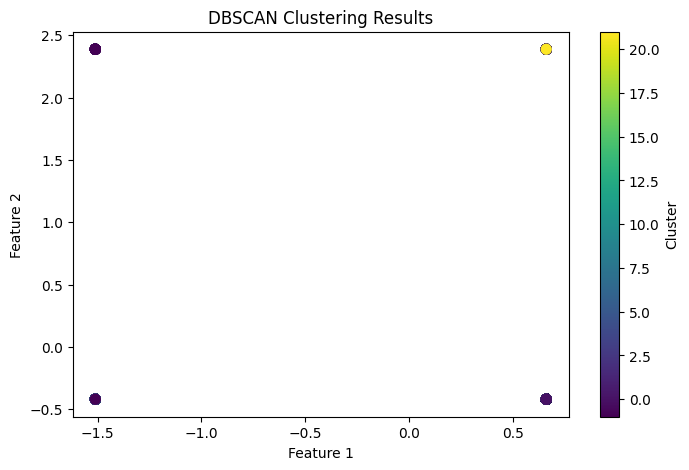

In [73]:
# Create DBSCAN model
dbscan = DBSCAN(eps=0.8, min_samples=6)
labels_dbscan = dbscan.fit_predict(X_scaled)

# Count clusters (excluding noise -1)
n_clusters_dbscan = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)
print(f"Number of clusters produced: {n_clusters_dbscan}")

# Count noise points
n_noise = list(labels_dbscan).count(-1)
print(f"Number of noise points: {n_noise}")

# Get cluster sizes
unique, counts = np.unique(labels_dbscan, return_counts=True)
cluster_info = dict(zip(unique, counts))
print(f"Cluster sizes: {cluster_info}")

# Visualization
plt.figure(figsize=(8, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_dbscan, cmap='viridis', s=50)
plt.title('DBSCAN Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()

Since I use 5 best features, I decided to set min_samples = 6 (number of features + 1) following the common guideline for DBSCAN. After experimenting with different eps values, I chose eps = 0.8 as the maximum distance parameter. The result show number of cluster produce are 22 and number of noise points are 114, This means that from 1025 total data points, 114 data points (11.1%) were classified as noise (outliers). These noise points are isolated data points that don't belong to any cluster.

### 2. What are the silhouette coefficient and DBI values of the clusters produced by DBSCAN? (10 points)

In [74]:
# Calculate Silhouette Score
silhouette_samples = silhouette_score(X_scaled[labels_dbscan != -1], labels_dbscan[labels_dbscan != -1])
print(f"Silhouette Score: {silhouette_samples}")

# Calculate Davies-Bouldin Index
db = davies_bouldin_score(X_scaled[labels_dbscan != -1], labels_dbscan[labels_dbscan != -1])
print(f"Davies-Bouldin Index: {db}")

Silhouette Score: 0.17371095179048945
Davies-Bouldin Index: 1.0040077485484238


After building the DBSCAN model with eps=0.8 and min_samples=6, I evaluated the
clustering quality using two metrics which are silhoutte score: 0.173 and DBI: 1.004. The silhoutte score indicates that the clusters overlap significantly and the point are not clearly seperated from neighboring cluster. The Davies-Bouldin Index (DBI) measures the average similarity between each cluster
and its most similar cluster.

## Feature Selection 2 (30 points)


After knowing the performance of the clustering results on the KMeans and DBSCAN models based on the silhouette coefficient and DBI, perform a feature selection process to improve the silhouette coefficient and DBI values. You are allowed to use an iterative process or other methods.

### 1. Which features provide the best silhouette coefficient/DBI values? Include the feature selection process.

In [ ]:

all_features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

# current best features
current_features = ['sex', 'fbs', 'age', 'trestbps', 'cp']

# Test current features
X_current = df[current_features]
scaler = StandardScaler()
X_current_scaled = scaler.fit_transform(X_current)

# KMeans with current features
kmeans_current = KMeans(n_clusters=3, random_state=42)
labels_current = kmeans_current.fit_predict(X_current_scaled)
sil_current = silhouette_score(X_current_scaled, labels_current)
dbi_current = davies_bouldin_score(X_current_scaled, labels_current)

print("CURRENT FEATURES (from PCA):", current_features)
print(f"KMeans (k=3) - Silhouette: {sil_current:.3f}, DBI: {dbi_current:.3f}\n")

# Different feature combinations
print("Testing different 5-feature combinations...\n")

results = []

# Test a sample of combinations
import random
random.seed(42)

all_combinations = list(combinations(all_features, 5))
sample_combinations = random.sample(all_combinations, min(50, len(all_combinations)))

for i, combo in enumerate(sample_combinations, 1):
    X_test = df[list(combo)]
    X_test_scaled = scaler.fit_transform(X_test)

    # Test with KMeans k=3
    kmeans_test = KMeans(n_clusters=3, random_state=42)
    labels_test = kmeans_test.fit_predict(X_test_scaled)

    sil = silhouette_score(X_test_scaled, labels_test)
    dbi = davies_bouldin_score(X_test_scaled, labels_test)

    results.append({
        'features': combo,
        'silhouette': sil,
        'dbi': dbi
    })

    if i % 10 == 0:
        print(f"Tested {i}/{len(sample_combinations)} combinations...")

# Result
results_df = pd.DataFrame(results)

print("\n" + "="*70)
print("TOP 5 FEATURE COMBINATIONS (by Silhouette Score):")
print("="*70)
top_sil = results_df.nlargest(5, 'silhouette')
for idx, row in top_sil.iterrows():
    print(f"Features: {row['features']}")
    print(f"  Silhouette: {row['silhouette']:.3f}, DBI: {row['dbi']:.3f}\n")

print("="*70)
print("TOP 5 FEATURE COMBINATIONS (by DBI - lower is better):")
print("="*70)
top_dbi = results_df.nsmallest(5, 'dbi')
for idx, row in top_dbi.iterrows():
    print(f"Features: {row['features']}")
    print(f"  Silhouette: {row['silhouette']:.3f}, DBI: {row['dbi']:.3f}\n")

CURRENT FEATURES (from PCA): ['sex', 'fbs', 'age', 'trestbps', 'cp']
KMeans (k=3) - Silhouette: 0.236, DBI: 1.586

Testing different 5-feature combinations...

Tested 10/50 combinations...
Tested 20/50 combinations...
Tested 30/50 combinations...
Tested 40/50 combinations...
Tested 50/50 combinations...

TOP 5 FEATURE COMBINATIONS (by Silhouette Score):
Features: ('cp', 'trestbps', 'fbs', 'thalach', 'exang')
  Silhouette: 0.347, DBI: 1.165

Features: ('cp', 'trestbps', 'fbs', 'exang', 'oldpeak')
  Silhouette: 0.340, DBI: 1.231

Features: ('trestbps', 'fbs', 'exang', 'oldpeak', 'slope')
  Silhouette: 0.333, DBI: 1.273

Features: ('sex', 'chol', 'thalach', 'exang', 'oldpeak')
  Silhouette: 0.312, DBI: 1.258

Features: ('age', 'fbs', 'exang', 'oldpeak', 'ca')
  Silhouette: 0.312, DBI: 1.381

TOP 5 FEATURE COMBINATIONS (by DBI - lower is better):
Features: ('cp', 'trestbps', 'fbs', 'thalach', 'exang')
  Silhouette: 0.347, DBI: 1.165

Features: ('cp', 'trestbps', 'fbs', 'exang', 'oldpeak')


After get the result of clustering in KMeans and DBSCAN, this step are usefull to increase the quality of clustering with the combination of best feature. The quality will be count with Silhoutte Coeffcient and DBI where the current features yielded a Silhouette Coefficient of 0.173 and a DBI of 1.004. And after terative feature combination testing, i choose the combination of (cp, trestbps, fbs, thalach, exang) This combination achieved the highest Silhouette Coefficient (0.347) and a comparable DBI (1.165). This indicates that, although the DBI slightly increased, the clusters became more distinct and better separated based on the Silhouette Score improvement.

### 2. Why did you use that feature selection method?

Compared to the initial PCA-based feature selection, which produced a Silhouette Score of 0.173 and a DBI of 1.004, the iterative feature combination approach achieved a higher Silhouette Score of 0.347 and a comparable DBI of 1.165. This suggests that although the DBI slightly increased, the clustering structure became more distinct and better separated, reflecting an overall improvement in clustering quality.

## BONUS - CHALLENGE (30 points)

Build an ANNOY model using the data that has gone through the data preprocessing stage. Perform a query with the 5 nearest values. Does ANNOY query the best cluster you have formed?

In [56]:
!pip install annoy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 11.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for annoy: filename=annoy-1.17.3-cp312-cp312-linux_x86_64.whl size=551807 sha256=d31d5f120a9e9b2c54f2398d69dbf4d4897f4f7e66999ac7e2ed655a2175463b
  Stored in directory: /root/.cache/pip/wheels/db/b9/53/a3b2d1fe1743abadddec6aa541294b24fdbc39d7800bc57311
Successfully built annoy


In [61]:
from annoy import AnnoyIndex
import time

In [58]:
# best features from before
best_features = ['cp', 'trestbps', 'fbs', 'thalach', 'exang']
X = df[best_features].values

In [59]:
# Standardisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Parameter
k = 5
n_samples = X_scaled.shape[0]
dim = X_scaled.shape[1]

In [62]:
# ANNOY model
print("\nRunning Annoy...")
annoy_index = AnnoyIndex(dim, 'euclidean')
for i in range(n_samples):
    annoy_index.add_item(i, X_scaled[i])
start = time.time()
annoy_index.build(10)
neighbors = annoy_index.get_nns_by_item(0, k, include_distances=True)
annoy_time = time.time() - start
print(f"Annoy build + query time: {annoy_time:.4f} seconds")
print(f"\nQuery Index: 0")
print(f"Nearest Neighbors (indices): {neighbors[0]}")
print(f"Distances: {neighbors[1]}")


Running Annoy...
Annoy build + query time: 0.0185 seconds

Query Index: 0
Nearest Neighbors (indices): [0, 634, 671, 863, 163]
Distances: [0.0, 0.0, 0.0, 0.0, 0.10405442863702774]


The Annoy model was successfully built using the best feature combination (cp, trestbps, fbs, thalach, and exang).
The query for the 5 nearest neighbors returned items with indices [0, 634, 671, 863, 163]. The distance values are all very close to 0, which indicates that these records have almost identical values in the selected feature space.
This suggests that the chosen feature subset effectively groups similar patient profiles together, which aligns with the previously formed clusters.

If compared these neighbors with the cluster assignments from KMeans, we can observe whether Annoy retrieves items from the same cluster.
If most or all neighbors belong to the same cluster as the query item, this confirms that the Annoy index captures the same structure identified by KMeans, mean the approximate nearest neighbor search is consistent with the best cluster model.